# A. General Information:
- **Name:** Eduardo Galindez.
- **Date:** August 16th, 2022.
- **ML Model:** Unsupervised Learning - KMeans.

# B. Code Development

## 1.- Libraries & Functions

In [1]:
# Libraries.
import numpy as np
import pandas as pd
import tmdbsimple as tmdb 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from tqdm.notebook import tqdm_notebook

## 2.- Data
- The data to work with is from Part A.

In [2]:
# Load title basics table.
main_df = pd.read_csv('./Data/DataFrame_Customers_with_Cluster.csv')
main_df.head(5)

,Age,Education,Years Employed,Income,Debt,Defaulted,DebtIncomeRatio,Cluster
0,41,2,6,19,1.197,0.0,6.3,0
1,47,1,26,100,12.800,0.0,12.8,1
2,33,2,10,57,11.913,1.0,20.9,2
3,29,2,4,19,1.197,0.0,6.3,0
4,47,1,31,253,18.216,0.0,7.2,1


In [3]:
# Check general info.
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Education        850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Debt             850 non-null    float64
 5   Defaulted        850 non-null    float64
 6   DebtIncomeRatio  850 non-null    float64
 7   Cluster          850 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 53.2 KB


**Notes:**
- 'Age', 'Education', 'Years Employed' & 'Clusters' are columns that must be object instead of numerics.
- 'Defaulted' column will be transformed to integer to then changed to object dtype.

In [4]:
# Let's convert 'Defaulted' to integer.
main_df['Defaulted'] = main_df['Defaulted'].apply(np.int64)

In [5]:
# Let's convert the columns mentioned to object.
main_df['Age'] = main_df['Age'].astype(object)
main_df['Education'] = main_df['Education'].astype(object)
main_df['Years Employed'] = main_df['Years Employed'].astype(object)
main_df['Cluster'] = main_df['Cluster'].astype(object)
main_df['Defaulted'] = main_df['Defaulted'].astype(object)


In [6]:
# Confirm transformation.
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    object 
 1   Education        850 non-null    object 
 2   Years Employed   850 non-null    object 
 3   Income           850 non-null    int64  
 4   Debt             850 non-null    float64
 5   Defaulted        850 non-null    object 
 6   DebtIncomeRatio  850 non-null    float64
 7   Cluster          850 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 53.2+ KB


## 3.- Hypothesis Test

**Notes:**
- The objective is to evaluate how each cluster would react to the advertising from Platinum & Gold Credit Cards.
- Our idea is to deliver marketing strategic suggestions based on two of the variables evaluated in Part A: Income & Debt. This way the campaign would have keywords related to the best result found it.
- Both variables (Income & Debt) are numeric and we have 3 clusters (0, 1 & 2) meaning that we are going to use [ANOVA](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php) to evaluate the hypothesis.

### 3.1. Is the income the main variable to be pointed in the advertising/marketing content?

Cluster
0    34.83
1    99.30
2    32.63
Name: Income, dtype: float64


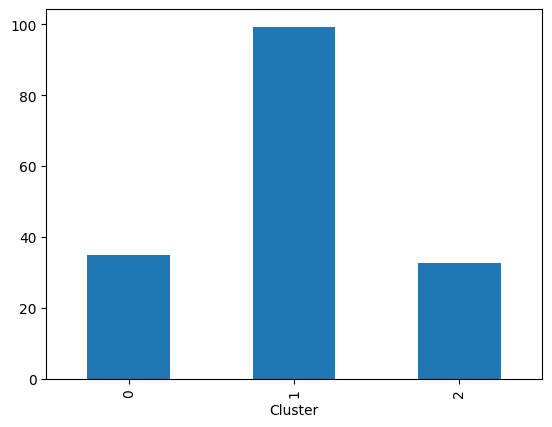

In [7]:
# Let's have a brief look of income per cluster.
main_df.groupby('Cluster')['Income'].mean().plot(kind='bar');
print(main_df.groupby('Cluster')['Income'].mean().round(2))

**Test for Significant Outliers**

In [8]:
# Separate the groups.
groups = {}
for i in main_df['Cluster'].unique():
    data = main_df.loc[main_df['Cluster']==i,'Income'].copy()
    groups[i] = data 
groups.keys()

dict_keys([0, 1, 2])

In [9]:
# Set up the columns needed.
needed_columns = ['Cluster', 'Income']

In [10]:
# Let's call back the keys in region.
groups.keys()

dict_keys([0, 1, 2])

In [11]:
# Look for outliers.
for Cluster, data in groups.items():
    outliers = np.abs(stats.zscore(data)) > 3
    print(f'We found', outliers.sum(), 'Outliers in cluster', Cluster)
    # Remove outliers.
    data = data.loc[~outliers]
    groups[Cluster] = data

We found 6 Outliers in cluster 0
We found 2 Outliers in cluster 1
We found 3 Outliers in cluster 2


### 3.2. Is the debt the main variable to be pointed in the advertising/marketing content?

# C. Conclusions

- Xxxxx